# Assignment 2

To be delivered until 2023/01/06 23:59:59.

## 1) Arduino

You will start by setting up a series of connections in order to extract some data with the Arduino. First make the connections as shown below. **Mind the direction of the temperature sensor. If you have an incorrect position, you will be connection the power to the ground and vice-versa and you will damage the sensor.** The photoresistor sensor on the other hand has no polarity.

<img src="temp_photo_cropped.png" width=1000/>

On this problem, you will read temperature and luminance from the sensors and print them on the serial.

**1)** Code an Arduino sketch, where the value of temperature and luminance are printed to the serial. For each serial print that you make, print the value of temperature, then a semicolon, then the value of luminance with a new line (use no whitespaces). You can do this by using three separate `Serial.print`, with the last one being a `Serial.println`. Print values 5 times per second (use the delay function to control this). Manually influence the readings of the sensors, by covering the photoresistor or shining light on it, and by lightly and carefully touching the temperature sensor to increase its temperature readings.

**Note that the temperature sensor appears not to be very reliable. Since the objective of this exercise is just to plot the results, this should not be an issue.**

**Copy and paste your arduino code below. You may use a python code cell, even though the code can not be run.**

*Hint: for the temperature value to be in celsius, divide the read value by 1024 and multiply it by 500. The luminance does not have to be converted*

In [ ]:
int pintemp = A1;
int pinlum = A0;

void setup() {
    Serial.begin(9600);
}
void loop() {
    int temp = analogRead(pintemp);
    int lum = analogRead(pinlum);
    temp = temp*0.4882815;
    Serial.print(temp);
    Serial.print(";");
    Serial.println(lum);
    delay(200);
}

To import the data into Arduino, keep it running (the Serial Monitor must be closed in Arduino) and run the following code. Change the COM port to your own. This block of code will read 1000 values from the Serial. Given that each observation is taken every 0.2 seconds, it should take a minute and a half.

In [9]:
import serial
import time

ser = serial.Serial('COM4', 9600, timeout=1)
time.sleep(2)

file = open('file1.txt', 'w')

for i in range(500):
    line = ser.readline()
    if line:
        string = line.decode()
        string = str(string)
        file.write(string)
        print(line)

ser.close()
file.close()

b'20;547\r\n'
b'30;548\r\n'
b'18;549\r\n'
b'22;549\r\n'
b'21;550\r\n'
b'30;550\r\n'
b'16;549\r\n'
b'17;548\r\n'
b'26;547\r\n'
b'22;546\r\n'
b'29;545\r\n'
b'29;545\r\n'
b'18;545\r\n'
b'21;545\r\n'
b'25;545\r\n'
b'24;546\r\n'
b'29;548\r\n'
b'25;549\r\n'
b'29;550\r\n'
b'25;550\r\n'
b'21;550\r\n'
b'29;549\r\n'
b'31;548\r\n'
b'21;547\r\n'
b'28;546\r\n'
b'26;546\r\n'
b'16;545\r\n'
b'24;545\r\n'
b'18;545\r\n'
b'20;546\r\n'
b'20;547\r\n'
b'23;548\r\n'
b'30;549\r\n'
b'17;550\r\n'
b'28;550\r\n'
b'17;550\r\n'
b'20;549\r\n'
b'27;548\r\n'
b'25;548\r\n'
b'17;547\r\n'
b'16;547\r\n'
b'18;546\r\n'
b'27;546\r\n'
b'31;546\r\n'
b'19;547\r\n'
b'16;548\r\n'
b'23;549\r\n'
b'21;548\r\n'
b'25;550\r\n'
b'29;551\r\n'
b'17;551\r\n'
b'21;550\r\n'
b'20;549\r\n'
b'32;548\r\n'
b'20;547\r\n'
b'17;546\r\n'
b'19;546\r\n'
b'20;546\r\n'
b'22;546\r\n'
b'29;546\r\n'
b'16;547\r\n'
b'28;548\r\n'
b'17;549\r\n'
b'22;550\r\n'
b'29;551\r\n'
b'32;550\r\n'
b'25;550\r\n'
b'16;549\r\n'
b'23;548\r\n'
b'24;547\r\n'
b'25;547\r\n'
b'17;5

Convert the data into a pandas dataframe and save it in a csv file. Besides the value of temperature and luminance, also include the time, considering the first observation at $t=0$ and every observation 0.2 seconds after the previous one. **The file must be submitted in Fenix and included in your Github repo**.

In [3]:
import pandas as pd
import numpy as np

t = 0
time = []
temp = []
lum = []

file = open('file.txt', 'r')

lines = file.readlines()[::2]
sample_count = len(lines)

time = np.arange(0, sample_count*0.2, 0.2)

for line in lines:
    data = line.strip()
    data = data.split(';')

    temp.append(float(data[0]))
    lum.append(float(data[1]))

vectors = {'time':time, 'temperature':temp, 'luminance':lum}

df = pd.DataFrame(vectors, columns=['time', 'temperature', 'luminance'])
df.to_csv('data.csv', index=False)

Plot the Temperature against time, the luminance against time and the temperature against the luminance.

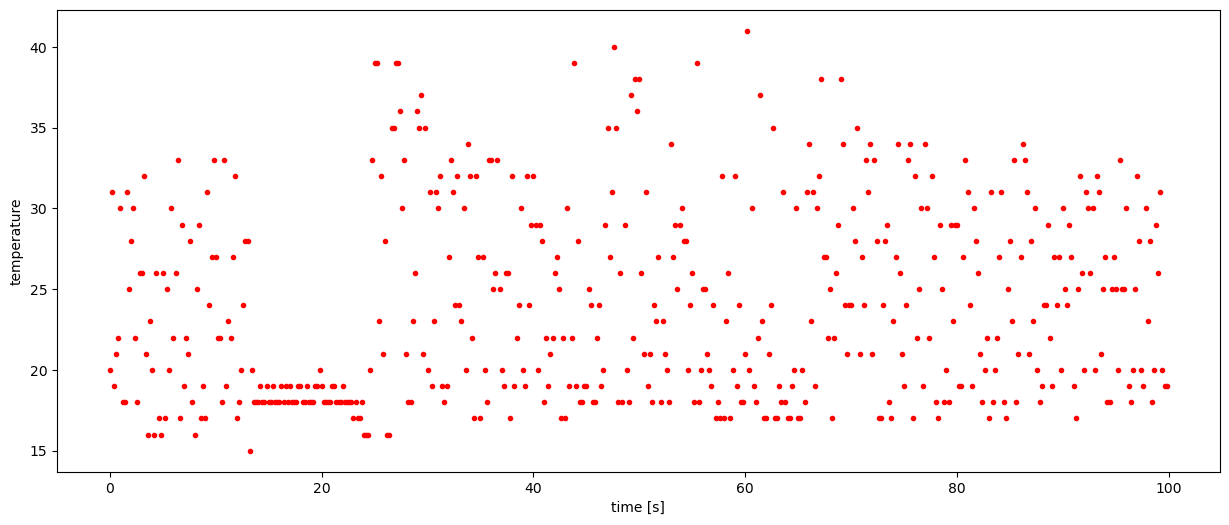

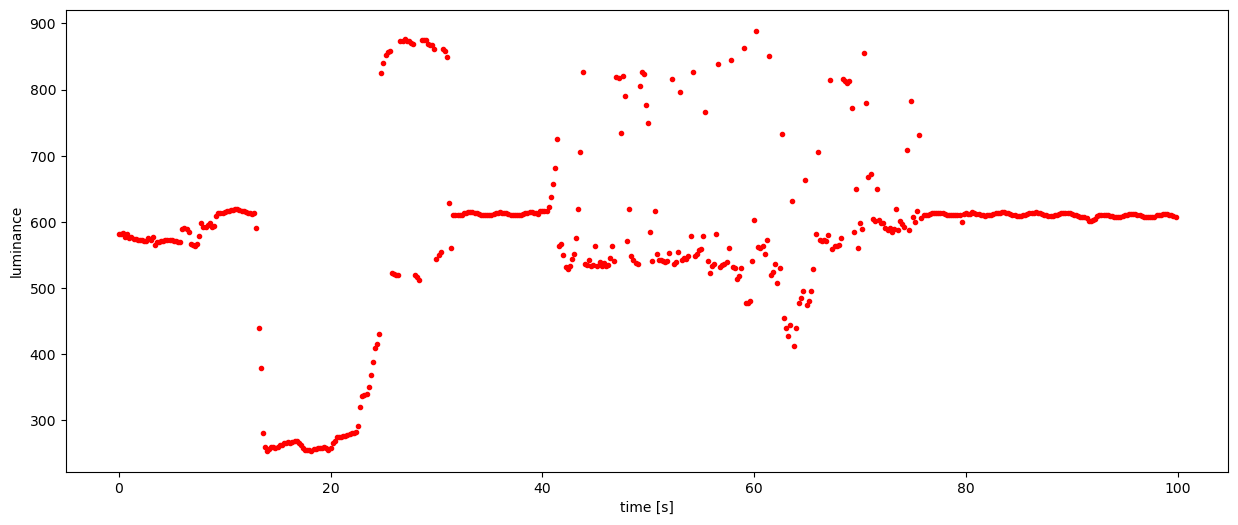

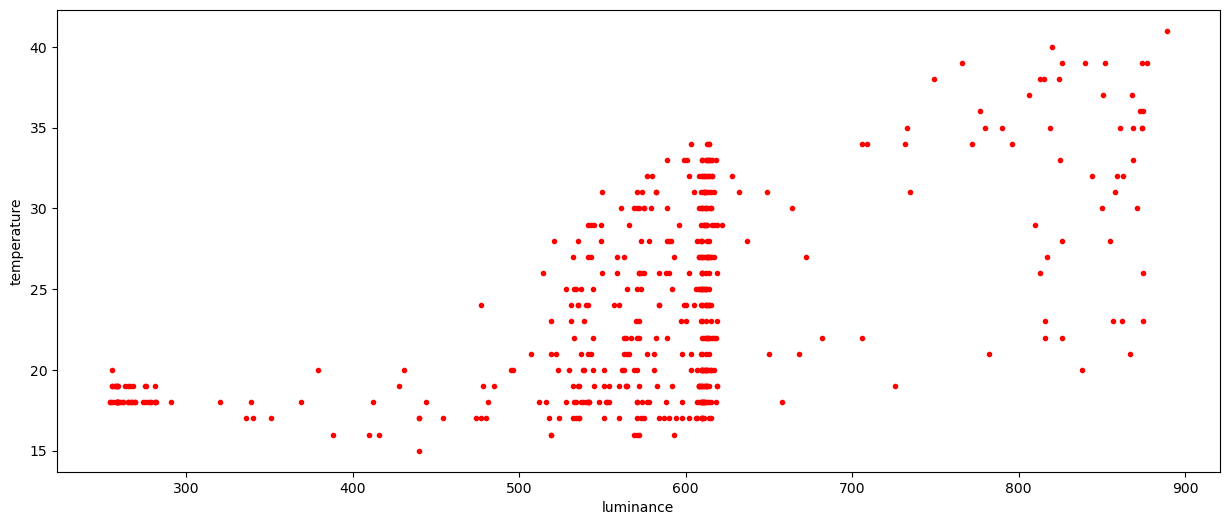

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 6]
plt.xlabel("time [s]")
plt.ylabel("temperature")
plt.plot(df['time'], df['temperature'],'.r')
plt.show()

plt.rcParams['figure.figsize'] = [15, 6]
plt.xlabel("time [s]")
plt.ylabel("luminance")
plt.plot(df['time'], df['luminance'],'.r')
plt.show()

plt.rcParams['figure.figsize'] = [15, 6]
plt.xlabel("luminance")
plt.ylabel("temperature")
plt.plot(df['luminance'], df['temperature'],'.r')
plt.show()

## 2) Databases

For the databases part of this assignment, you will use the mimic-iii database from the laboratory session. Start by adding a few new tables to the database, using the SQL files included in the assignment's files. Open PGAdmin and connect to your mimic-iii database. **To properly load these tables, load the following files exactly and by the order presented.**

1) Run demographic.sql

2) Run lab_firstday.sql

You will now have to answer a few SQL questions.

**1.** Open the connection to your mimic-iii database. If you want, you can delete your credentials before submitting the assignment, but if you do so, please run the notebook first, for the results to be displayed.

In [4]:
#Import required libraries
import psycopg2 as psql
import pandas as pd

#Define function to conncet to a specified databse
def connect(datab):
    conn = psql.connect(host='localhost',
                        database = datab,
                        user='postgres',
                        password='9667716',
                        port=5432)

    #Create a cursor object using the cursor() method
    cursor = conn.cursor()

    #Execute a SQL function using the execute() method
    cursor.execute("select version()")

    # Fetch a single row using fetchone() method
    data = cursor.fetchone()
    print("Connection established to: ", data)

    #Return conn varaible
    return conn

connect('mimic-iii')


Connection established to:  ('PostgreSQL 15.1, compiled by Visual C++ build 1914, 64-bit',)


<connection object at 0x0000023EF56E3E10; dsn: 'user=postgres password=xxx dbname=mimic-iii host=localhost port=5432', closed: 0>

**2.** Create a function that receives an SQL query and automatically opens a cursor, queries the database, extracts the columns, creates a pandas database, and closes the connections.

In [5]:
#Define function 
def auto_query(query, database):
    #Get conn cariable from specific database
    conn = connect(database)
    
    #Create a cursor object using the cursor() method
    cursor = conn.cursor()

    #Execute a SQL function using the execute() method
    cursor.execute(query)

    #Extract the column names and obtain the data from the cursor
    colnames = [desc[0] for desc in cursor.description]
    data = cursor.fetchall()

    #Creat a pandas database
    table = pd.DataFrame(data, columns = colnames)

    #Close the connection
    conn.close()

    #Displays the table 
    return table

**3.** Query the table admissions filtering for admission type as emergency and insurance as private.

In [6]:
#Define query
query = "SELECT * FROM public.admissions " +\
        "WHERE admission_type = 'EMERGENCY' AND insurance = 'Private'"
    
#Execute auto_query function
auto_query(query, 'mimic-iii')



Connection established to:  ('PostgreSQL 15.1, compiled by Visual C++ build 1914, 64-bit',)


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaT,NaT,HEPATITIS B,1,1
1,12317,10067,160442,2130-10-06 01:34:00,2130-10-06 02:29:00,2130-10-06 02:29:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,UNOBTAINABLE,None,OTHER,2130-10-06 00:12:00,2130-10-06 01:30:00,S/P MOTORCYCLE ACCIDENT,1,1
2,12339,10088,149044,2107-05-12 18:00:00,2107-05-18 13:30:00,NaT,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,Private,None,UNOBTAINABLE,UNKNOWN (DEFAULT),WHITE,NaT,NaT,UROSEPSIS,0,1
3,12341,10090,176805,2124-01-12 14:26:00,2124-01-14 19:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,DISCH-TRAN TO PSYCH HOSP,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2124-01-12 11:56:00,2124-01-12 16:09:00,OVERDOSE,0,1
4,12349,10098,180685,2170-12-02 23:24:00,2170-12-03 15:55:00,2170-12-03 15:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,UNOBTAINABLE,None,OTHER,2170-12-02 22:45:00,2170-12-03 00:56:00,STATUS POST MOTOR VEHICLE ACCIDENT WITH INJURIES,1,1
5,12357,10106,133283,2161-09-14 22:22:00,2161-09-19 17:00:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,None,CATHOLIC,MARRIED,WHITE,2161-09-14 14:45:00,2161-09-15 01:30:00,HEADACHE,0,1
6,12368,10117,187023,2138-06-05 17:23:00,2138-06-11 10:16:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,2138-06-05 11:42:00,2138-06-05 21:20:00,FEVER,0,1
7,12369,10117,105150,2138-11-09 18:08:00,2138-11-18 23:13:00,2138-11-18 23:13:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,2138-11-09 15:42:00,2138-11-09 20:42:00,FEVER,1,1
8,12381,10126,160445,2171-07-12 06:02:00,2171-08-16 12:00:00,2171-08-16 12:00:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,DEAD/EXPIRED,Private,None,UNOBTAINABLE,SINGLE,WHITE,NaT,NaT,LIVER FAILURE,1,1
9,12382,10127,182839,2198-06-28 05:34:00,2198-07-20 14:56:00,NaT,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Private,None,NOT SPECIFIED,None,WHITE,2198-06-28 04:28:00,2198-06-28 05:52:00,S/P MOTOR VEHICLE ACCIDENT,0,1


**4.** Query the table admissions, filtering for the same conditions as the previous exercise (admission type as emergency and insurance as private). Join the "drgcodes" table on the admission ID. Display only the columns regarding the subject id, admission id, time of death, and description of the drug.

In [7]:
#Define query
query=  "SELECT * FROM public.admissions " +\
        "LEFT JOIN public.drgcodes " +\
        "ON public.admissions.hadm_id = public.drgcodes.hadm_id " +\
        "WHERE admission_type = 'EMERGENCY' AND insurance = 'Private'"

#Execute auto_query function
table = auto_query(query, 'mimic-iii')

#Filter the obtained table
keep_cols = ['subject_id', 'hadm_id', 'deathtime', 'description']
table_filtered = table[keep_cols]

#Remove duplicated subject_id and hadm_id
table_filtered = table_filtered.iloc[:,list(set(range(table_filtered.shape[1])) - set([1, 3]))]

#Displays final table
table_filtered

Connection established to:  ('PostgreSQL 15.1, compiled by Visual C++ build 1914, 64-bit',)


,subject_id,hadm_id,deathtime,description
0,10130,156668,NaT,MAJOR SMALL & LARGE BOWEL PROCEDURES WITH COMP...
1,10117,187023,NaT,DENTAL & ORAL DIS EXCEPT EXTRACTIONS & RESTORA...
2,10011,105331,2126-08-28 18:59:00,"DISORDERS OF LIVER EXCEPT MALIGNANCY, CIRRHOSI..."
3,10117,105150,2138-11-18 23:13:00,SIMPLE PNEUMONIA & PLEURISY AGE >17 WITH COMPL...
4,10106,133283,NaT,NERVOUS SYSTEM INFECTION EXCEPT VIRAL MENINGITIS
5,10126,160445,2171-08-16 12:00:00,Liver Transplant
6,10126,160445,2171-08-16 12:00:00,ECMO OR TRACHEOSTOMY WITH MECHANICAL VENTILATI...
7,10088,149044,NaT,SEPTICEMIA AGE >17
8,10098,180685,2170-12-03 15:55:00,Craniotomy for Trauma
9,10098,180685,2170-12-03 15:55:00,"CRANIOTOMY AGE >17 WITH COMPLICATIONS, COMORBI..."


**5.1.** Obtain the dataset for this problem, by running the SQL query below.

In [16]:
query = "SELECT pivoted_lab.*," +\
                "gender as gender," +\
                "admission_age," +\
                "ethnicity_grouped as eth_grp," +\
                "hospital_expire_flag," +\
                "los_icu " +\
        "FROM demographics " +\
        "LEFT JOIN pivoted_lab " +\
        "ON demographics.icustay_id = pivoted_lab.icustay_id " +\
        "WHERE first_icu_stay = true"

dataset1 = auto_query(query, 'mimic-iii')

dataset1

Connection established to:  ('PostgreSQL 15.1, compiled by Visual C++ build 1914, 64-bit',)


,subject_id,hadm_id,icustay_id,aniongap_min,aniongap_max,albumin_min,albumin_max,bands_min,bands_max,bicarbonate_min,...,sodium_max,bun_min,bun_max,wbc_min,wbc_max,gender,admission_age,eth_grp,hospital_expire_flag,los_icu
0,10006,142345,206504,12.0,20.0,2.7,3.4,NaN,NaN,29.0,...,139.0,9.0,11.0,4.6,7.8,F,70.0,black,0,1.0
1,10011,105331,232110,12.0,12.0,2.6,2.6,2.0,2.0,23.0,...,136.0,3.0,3.0,10.6,10.6,F,36.0,unknown,1,13.0
2,10013,165520,264446,13.0,13.0,NaN,NaN,13.0,13.0,29.0,...,138.0,32.0,32.0,13.8,16.2,F,87.0,unknown,1,2.0
3,10017,199207,204881,13.0,13.0,2.8,2.8,NaN,NaN,29.0,...,139.0,3.0,3.0,15.8,15.8,F,74.0,white,0,2.0
4,10019,177759,228977,20.0,46.0,3.2,3.2,NaN,NaN,10.0,...,141.0,31.0,53.0,3.7,6.8,M,49.0,white,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,44083,198330,286428,16.0,16.0,NaN,NaN,NaN,NaN,21.0,...,142.0,12.0,12.0,12.3,14.9,M,55.0,white,0,3.0
124,44154,174245,217724,15.0,15.0,NaN,NaN,NaN,NaN,19.0,...,142.0,16.0,21.0,12.2,17.1,M,300.0,white,1,0.0
125,44212,163189,239396,15.0,21.0,2.9,3.0,NaN,NaN,18.0,...,150.0,37.0,57.0,8.8,11.4,F,45.0,black,0,31.0
126,44222,192189,238186,11.0,15.0,NaN,NaN,NaN,NaN,22.0,...,135.0,21.0,24.0,9.3,9.9,M,73.0,white,0,1.0


**5.2.** Close the connection to your SQL server.

In [14]:
#NOTE: The connection is automatically colsed when executing auto_query function.
conn.close()

**5.3.** Prepare your dataset:

* Drop the ID columns of subject, admission and ICU stay.
* Drop columns with at least one NA value.
* Encode the categorical columns, the ethnicity and gender ('eth_grp', 'gender'). *Suggestion: use pd.get_dummies*
* Consider the column 'hospital_expire_flag' as the response and all remaining columns as the predictors.

In [20]:
#Drop the ID columns of subject, admission and ICU stay
dataset = dataset1.drop(columns = ['subject_id','hadm_id','icustay_id'])

#Drop NaN Columns
dataset = dataset.dropna(axis=1)

#Encode categories
dummies = pd.get_dummies(dataset[['eth_grp', 'gender']])
dataset = dataset.drop(columns=['eth_grp', 'gender'])

#Create Final DataSet
dataset = pd.concat([dataset, dummies], axis=1)
dataset.head()

#Display final dataset
dataset

,bicarbonate_min,bicarbonate_max,creatinine_min,creatinine_max,chloride_min,chloride_max,glucose_min,glucose_max,hematocrit_min,hematocrit_max,...,los_icu,eth_grp_asian,eth_grp_black,eth_grp_hispanic,eth_grp_native,eth_grp_other,eth_grp_unknown,eth_grp_white,gender_F,gender_M
0,29.0,31.0,3.0,3.5,96.0,100.0,84.0,217.0,36.9,42.4,...,1.0,0,1,0,0,0,0,0,1,0
1,23.0,23.0,0.7,0.7,107.0,107.0,79.0,79.0,33.9,34.0,...,13.0,0,0,0,0,0,1,0,1,0
2,29.0,29.0,1.7,1.7,98.0,100.0,134.0,165.0,28.1,29.2,...,2.0,0,0,0,0,0,1,0,1,0
3,29.0,29.0,0.3,0.3,100.0,100.0,137.0,137.0,27.5,27.5,...,2.0,0,0,0,0,0,0,1,1,0
4,10.0,18.0,4.0,7.2,83.0,104.0,80.0,360.0,30.6,36.0,...,1.0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,21.0,21.0,0.7,0.7,108.0,108.0,151.0,151.0,26.0,29.0,...,3.0,0,0,0,0,0,0,1,0,1
124,19.0,19.0,0.9,0.9,107.0,113.0,164.0,177.0,40.8,41.8,...,0.0,0,0,0,0,0,0,1,0,1
125,18.0,23.0,3.0,4.8,108.0,115.0,99.0,122.0,23.8,25.9,...,31.0,0,1,0,0,0,0,0,1,0
126,22.0,27.0,1.2,1.7,100.0,101.0,56.0,268.0,37.8,39.0,...,1.0,0,0,0,0,0,0,1,0,1


**6.** Fit the following tree-based classifiers to the dataset. For each method:

* Perform k-fold cross validation to evaluate the models. Consider 10 folds.

* Plot the ROC curves for each fold, along with the mean ROC curve.

* Calculate the mean AUC.

**a.** Decision tree.

In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomFor
from sklearn.metrics import confusion_matrix, mean_squared_error, auc, roc_curve

#Divide Data
y = DataSet.hospital_expire_flag
X = dataset.drop(['hospital_expire_flag'], axis = 1)

#Cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
clf_dt = DecisionTreeClassifier(max_depth=5)

tprs = []
aucs = []

mean_fpr = np.linspace(0,1,100)

fig, ax = plt.subplots()

for i, (train,test) in enumerate(kfold.split(X,y)):
    clf_dt.fit(X.loc[train], y[train])
    y_proba = clf_dt.predict_proba(X.loc[test])
    fpr, tpr, _ = roc_curve(y[test], y_proba[:,1])
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    
    tprs.append(interp_tpr)
    aucs.append(auc(fpr,tpr))
    
    ax.plot(
    fpr, tpr,
    label='ROC fold ' + str(i+1) + ' - AUC = ' + str(np.round(auc(fpr,tpr),2)),
    lw=1,
    alpha=0.3)

# Plot mean roc curve auc
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(
mean_fpr,
mean_tpr,
color="b",
label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
lw=2,
alpha=0.8,
)

ax.set(
xlim=[-0.05, 1.05],
ylim=[-0.05, 1.05],
title="Receiver operating characteristic example",
)

ax.legend(loc="lower right")
plt.show()

ModuleNotFoundError: No module named 'sklearn'

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.model_selection (from versions: none)
ERROR: No matching distribution found for sklearn.model_selection


**b.** Random forest

**c.** Gradient Boosting

**7.1.** Perform a grid search cross-validation on the Gradient boosting methods, changing the value of the learning rate (0.01 to 0.5) and the number of estimators (50-500). Consider the mean AUC of the folds as the performance measure.

**7.2.** Plot a scatterplot of the learning rate versus the number of estimators, with the mean AUC as the color gradient.

**8.1.** Perform forward stepwise selection on the dataset. Use the best parameters of the gradient boosting method obtained in **7.1.**.

**8.2.** Compare and comment the results from **8.1.** with the features importance obtained through the grid search of queastion **7.1.**.

## 3) Theoretical Questions

**1.** Consider a dataset where best subset, forward stepwise and backward stepwise selection will be performed. For each of the 3 approaches, we obtain $p+1$ models, $p$ being the total number of predictors. This means that each approach has a model with 0 predictors, one with 1 predictor, one with 2 predictor, up until one model with $p$ predictors. Answer and justify the following questions:

**a)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest training RSS?

In general, the model with k predictors that is selected using best subset selection will have the smallest training RSS among the three approaches for a given value of k. This is because best subset selection considers all possible models with k predictors and chooses the one with the lowest training RSS.

Forward stepwise selection and backward stepwise selection are both greedy algorithms that consider a limited set of models and choose the one that results in the lowest training RSS at each step. As a result, the model selected by either of these approaches may not necessarily have the lowest training RSS among all possible models with k predictors.

**b)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest test RSS?

The model with the smallest test RSS is the one that fits the best to new data. In general, the model with the smallest test RSS will not necessarily be the same as the model with the smallest training RSS, since the latter may be overfit to the training data and not generalize well to new sets of data.

**c)** Evaluate the following statements with *true* or *false*. Justify your answers.

    i. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.

True. 
In forward stepwise selection, the algorithm adds predictors to the previous best model. Therefore, a (k+1)-variable model will contain all the predictors in a k-variable model.

    ii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by backward stepwise selection.

True. 
In backward stepwise selection, the algorithm will progressively remove the least useful predictors, one by one. This means that a (k+1)-variable model will accomodate all predictors present in the next iteration of the backward stepwise selection (which will have a k-variable model).

    iii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by forward stepwise selection.

False.
The forward and backward stepwise selection methods are independent from one another and the models produced by one don't have any relation to the models produced by the other.

    iv. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.

False.
The forward and backward stepwise selection methods are independent from one another and the models produced by one don't have any relation to the models produced by the other.

    v. The predictors in the k-variable model identified by best subset selection are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.

False. 
While that would be true for the forward and backward stepwise selection methods, because they are greedy, that is not the case with the best subset selection. A best subset selected model with k+1 variables doesn't necessarily contain all the k predictors in a k-variable model because the best subset selection method will go through every single possible model, choosing the best one among them.

**2.** Ridge regression tends to give similar coefficient values to correlated variables, whereas lasso regression may give substantially different coefficients to correlated variables. This questions explores this property in a simplified setting.

Suppose that $n=2$, $p=2$, $x_{11} = x_{12}$, $x_{21} = x_{22}$. Moreover, suppose that $y_1 + y_2 = 0$ and $x_{11} + x_{21} = 0$ and $x_{12} + x_{22} = 0$, meaning that the estimate for the intercept in a least squares, ridge regression, or lasso regression is zero: $\hat{\beta} = 0$.

**a)** Write the ridge regression optimization problem in this setting.

**b)** Prove that in this setting, the ridge regression coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.

**c)** Write the lasso regression optimization problem in this setting.

**d)** Prove that in this setting, the lasso regression coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique, meaning that there are many possible solutions to the optimization problem in (c). Describe these solutions.

**3.** Draw an example of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions R1, R2,..., the cutpoints t1, t2,..., and so forth.

If you prefer you can draw it by hand or in any software and use a scan of it.

**4.** In 2 dimensions, a linear decision boundary takes the form $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$. Consider a nn-linear decision boundary:

**a)** Sketch the curve

$$(1 + X_1)^2 + (2 - X_2)^2 = 4$$

Additionally, indicate on your sketch the set of points that verify the condition

$$(1 + X_1)^2 + (2 - X_2)^2 > 4$$

and the condition

$$(1 + X_1)^2 + (2 - X_2)^2 \leq 4$$

**b)** Suppose that a classifier assigns an observation to the blue class if $(1 + X_1)^2 + (2 - X_2)^2 > 4$ and to the red class otherwise. To what class are the following observations classified? (0,0), (-1,1), (2,2), (3,8)

**c)** Prove that while the decision boundary in (b) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.

# 4) Laboratory Questions

What are the advantages and disadvantages of relational dabases versus graph databases, and when should one type be preferred over the other?